<a href="https://colab.research.google.com/github/Claudiatchobo06/Data-Science-AI-AgriTech/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atelier Google Colab – Data Science appliquée à l’Agriculture
**Durée : 1h | Public : Agronomes | Dataset : `agri_data.csv`**

Objectifs :
- Charger et explorer un dataset agricole
- Nettoyer les valeurs manquantes et les doublons
- Produire des visualisations de base avec Matplotlib
- Calculer des statistiques descriptives

> Astuce : Téléversez le fichier `agri_data.csv` dans l'espace Colab (ou gardez-le au même chemin si vous l'exécutez localement).

## 1) Installation & Import des librairies

In [ ]:
# (Colab) Décommentez si besoin pour vérifier la version de Python et packages
import sys, pandas as pd, numpy as np
import matplotlib.pyplot as plt

print('Python:', sys.version)
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Matplotlib:', plt.matplotlib.__version__)


Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Matplotlib: 3.10.0


## 2) Chargement du dataset
Assurez-vous que le fichier **`agri_data.csv`** est accessible dans l'environnement d'exécution.
| Argument                                 | Description                                    |          |
| ---------------------------------------- | ---------------------------------------------- | -------- |
| `sep=","`                                | Define the separator (`,`, `;`, `\t`, `        | `, etc.) |
| `header=0`                               | Row number to use as header (default is 0)     |          |
| `names=[...]`                            | Manually define column names                   |          |
| `index_col="ColName"`                    | Set a column as index                          |          |
| `usecols=[...]`                          | Load only specific columns                     |          |
| `dtype={"col": type}`                    | Force data types (e.g., `int`, `float`, `str`) |          |
| `parse_dates=["Date"]`                   | Convert column(s) to datetime                  |          |
| `date_parser=`                           | Custom function to parse dates                 |          |
| `na_values=["?", "-", "NA"]`             | Define custom missing values                   |          |
| `keep_default_na=True`                   | Keep default NA values or not                  |          |
| `skiprows=5`                             | Skip the first 5 rows                          |          |
| `nrows=100`                              | Read only first 100 rows                       |          |
| `encoding="utf-8"`                       | File encoding (`utf-8`, `latin-1`, etc.)       |          |
| `error_bad_lines=False` *(pandas < 1.3)* | Skip bad formatted lines                       |          |
| `skip_blank_lines=True`                  | Ignore empty lines                             |          |
| `thousands=","`                          | Parse numbers with thousands separators        |          |
| `decimal="."`                            | Decimal symbol (`.` or `,`)                    |          |
| `low_memory=False`                       | Better type inference (uses more RAM)          |          |
| `engine="python"`                        | Alternate parser for complex separators        |          |




In [ ]:
import pandas as pd

# Si vous êtes dans Colab, vous pouvez téléverser le fichier via l'icône dossier (à gauche).
# Ici on suppose que le fichier est au chemin courant.
csv_path = "agri_data.csv"  # changez le chemin si besoin
df = pd.read_csv(csv_path, parse_dates=["Date"])
print("Taille du dataset :", df.shape)
df.head()


Taille du dataset : (60, 5)


,Date,Temperature_C,Rainfall_mm,Humidity_%,Yield_Index
0,2024-03-01,27.0,5.6,NaN,31.2
1,2024-03-02,24.4,7.2,51.9,40.4
2,2024-03-03,27.6,14.8,56.3,26.7
3,2024-03-04,31.1,20.5,77.3,37.1
4,2024-03-05,24.1,10.9,72.5,32.4


**3) Conversion de Type de donnees**
Fonction                   | Rôle                                                    |
| -------------------------- | ------------------------------------------------------- |
| `df.dtypes`                | Vérifier le type de chaque colonne                      |
| `df.astype(type)`          | Conversion générale (`int`, `float`, `str`, `category`) |
| `df.astype({"col": type})` | Conversion par colonne (dictionnaire)                   |
| `pd.to_numeric()`          | Conversion en numérique (gère erreurs)                  |
| `pd.to_datetime()`         | Conversion en date/temps                                |
| `pd.to_timedelta()`        | Conversion en durée (heures, jours)                     |
| `df.infer_objects()`       | Deviner types automatiquement                           |
| `df.convert_dtypes()`      | Conversion automatique aux meilleurs types              |

| Situation                    | Méthode                                 |
| ---------------------------- | --------------------------------------- |
| Convertir une date textuelle | `pd.to_datetime(df['Date'])`            |
| Colonnes NDVI en float       | `df['NDVI'] = df['NDVI'].astype(float)` |
| Valeurs '?', '--' converties | `pd.to_numeric(..., errors='coerce')`   |


In [ ]:
df['Temperature_C'] = df['Temperature_C'].astype(float)
print(df['Temperature_C'].dtype)

float64


## 4) Exploration rapide
| Commande            | Rôle                                          |
| ------------------- | --------------------------------------------- |
| `df.head()`         | Afficher les premières lignes (aperçu global) |
| `df.tail()`         | Afficher les dernières lignes                 |
| `df.shape`          | Dimensions du dataset (lignes, colonnes)      |
| `df.columns`        | Liste des noms de colonnes                    |
| `df.info()`         | Types de données + valeurs manquantes         |
| `df.describe()`     | Statistiques descriptives (numériques)        |
| `df.dtypes`         | Type de chaque colonne                        |
| `df.sample()`       | Extraire une ligne aléatoire                  |
| `df.isnull().sum()` | Compte des valeurs manquantes par colonne     |
| `df.nunique()`      | Nombre de valeurs uniques par colonne         |
| `df.value_counts()` | Fréquences d'une variable (catégorielle)      |

| Parameter                  | Description                                                   |
| -------------------------- | ------------------------------------------------------------- |
| `percentiles=[...]`        | List of percentiles to include (default: `[0.25, 0.5, 0.75]`) |
| `include='all'`            | Include **all columns**, numeric + object + categorical       |
| `include=[...]`            | Specify types to include, e.g. `['object', 'float', 'int']`   |
| `exclude=[...]`            | Exclude types, e.g. `exclude=['object']`                      |
| `datetime_is_numeric=True` | Treat datetime columns as numeric (Pandas ≥ 1.1)              |


In [ ]:
# Aperçu des colonnes, types et valeurs manquantes
display(df.info())
display(df.describe(include='all'))
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           60 non-null     datetime64[ns]
 1   Temperature_C  60 non-null     float64       
 2   Rainfall_mm    57 non-null     float64       
 3   Humidity_%     58 non-null     float64       
 4   Yield_Index    60 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.5 KB


None

,Date,Temperature_C,Rainfall_mm,Humidity_%,Yield_Index
count,60,60.000000,57.000000,58.000000,60.000000
mean,2024-03-30 12:00:00,24.381667,9.835088,68.696552,26.663333
min,2024-03-01 00:00:00,17.200000,1.100000,40.800000,7.500000
25%,2024-03-15 18:00:00,22.250000,5.200000,55.925000,19.800000
50%,2024-03-30 12:00:00,24.100000,8.800000,71.200000,26.650000
75%,2024-04-14 06:00:00,26.625000,10.900000,82.575000,32.575000
max,2024-04-29 00:00:00,32.400000,36.500000,89.500000,43.800000
std,NaN,3.635209,6.784423,14.614292,8.048581


,0
Date,0
Temperature_C,0
Rainfall_mm,3
Humidity_%,2
Yield_Index,0


**5) Nettoyage des données**
Fonction                   | Rôle                                       |
| -------------------------- | ------------------------------------------ |
| `df.isnull()`              | Détecter les valeurs manquantes            |
| `df.isnull().sum()`        | Compter les valeurs manquantes par colonne |
| `df.dropna()`              | Supprimer les lignes ou colonnes avec NaN  |
| `df.fillna(value)`         | Remplacer les valeurs manquantes           |
| `df.replace(old, new)`     | Remplacer une valeur spécifique            |
| `df.drop_duplicates()`     | Supprimer les doublons                     |
| `df.duplicated()`          | Identifier les doublons (True/False)       |
| `df.rename(columns={})`    | Renommer colonnes                          |
| `df.strip()` *(via apply)* | Nettoyer espaces, caractères               |
| `df.astype(type)`          | Convertir type de données                  |
| `df.clip(lower, upper)`    | Limiter valeurs extrêmes (outliers)        |

| Option                      | Description                              |
| --------------------------- | ---------------------------------------- |
| `df.dropna(axis=0 or 1)`    | 0 = supprimer lignes, 1 = colonnes       |
| `df.dropna(thresh=…)`       | Garder lignes avec un minimum de valeurs |
| `df.fillna(method='ffill')` | Remplir selon ligne précédente           |
| `df.fillna(method='bfill')` | Remplir selon ligne suivante             |
| `df.replace({'?': np.nan})` | Transformer symboles en NaN              |


In [ ]:
# 4.1) Gestion des doublons
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Doublons supprimés : {before - after}")

# 4.2) Gestion des valeurs manquantes
# Stratégie : imputation par moyenne/median selon la variable
num_cols = ["Temperature_C", "Rainfall_mm", "Humidity_%", "Yield_Index"]
for col in num_cols:
    if df[col].isna().sum() > 0:
        # Exemple : moyenne pour Rainfall, mediane pour Humidity
        if col == "Rainfall_mm":
            fill_value = df[col].mean()
        elif col == "Humidity_%":
            fill_value = df[col].median()
        else:
            fill_value = df[col].mean()
        df[col] = df[col].fillna(fill_value)

# Vérification
df.isna().sum()


Remplissage des valeurs manquante
| Fonction                                       | Rôle                                            |
| ---------------------------------------------- | ----------------------------------------------- |
| `df.fillna(value)`                             | Remplir NaN avec une valeur fixe                |
| `df.fillna(method='ffill')`                    | Remplir par la valeur précédente (forward fill) |
| `df.fillna(method='bfill')`                    | Remplir par la valeur suivante (backward fill)  |
| `df.interpolate()`                             | Interpolation linéaire par défaut               |
| `df.interpolate(method='time')`                | Interpolation selon l’axe temporel              |
| `df.interpolate(method='polynomial', order=2)` | Interpolation polynomiale (courbe)              |
| `df.interpolate(method='nearest')`             | Prendre la valeur la plus proche                |
| `df.interpolate(limit=...)`                    | Limiter le nombre de NaN remplis                |
| `df.interpolate(limit_direction='both')`       | Remplir avant et après                          |

| Option            | Description                       |
| ----------------- | --------------------------------- |
| `method='linear'` | Par défaut (entre deux valeurs)   |
| `method='spline'` | Courbe lissée                     |
| `method='pad'`    | Même effet que `ffill`            |
| `axis=0/1`        | Lignes ou colonnes                |
| `inplace=True`    | Modifier directement le DataFrame |


In [ ]:
#Gestion des valeurs manquantes - Interpolation
# Stratégie : interpolation linéaire pour les variables numériques
num_cols_for_interpolation = ["Temperature_C", "Rainfall_mm", "Humidity_%", "Yield_Index"]
for col in num_cols_for_interpolation:
    if df[col].isna().sum() > 0:
        df[col] = df[col].interpolate(method='linear')

# Vérification après interpolation
print("Nombre de valeurs manquantes après interpolation :")
display(df.isna().sum())

## 6) Ingénierie de variables (basique)

In [ ]:
# Exemple : créer des variables dérivées simples
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

# Exemple : Indice hydrique simple (fictif)
df['Hydric_Index'] = (df['Rainfall_mm'] * 0.6 + df['Humidity_%'] * 0.4)
df.head()


## 7) Statistiques descriptives ciblées
| Fonction            | Description                         |
| ------------------- | ----------------------------------- |
| `df.describe()`     | Statistiques générales (numériques) |
| `df.mean()`         | Moyenne                             |
| `df.median()`       | Médiane                             |
| `df.mode()`         | Valeur(s) la plus fréquente(s)      |
| `df.std()`          | Écart-type                          |
| `df.var()`          | Variance                            |
| `df.min()`          | Minimum                             |
| `df.max()`          | Maximum                             |
| `df.sum()`          | Somme totale                        |
| `df.count()`        | Nombre de valeurs non nulles        |
| `df.quantile(0.25)` | Quantile (ex: 25%)                  |
| `df.corr()`         | Corrélation entre variables         |
| `df.skew()`         | Asymétrie de distribution           |
| `df.kurt()`         | Aplatissement (kurtosis)            |

| Exemple                     | Rôle                          |
| --------------------------- | ----------------------------- |
| `df['NDVI'].mean()`         | Moyenne de NDVI               |
| `df['Temp'].min()`          | Valeur minimum de température |
| `df['Pluie'].quantile(0.9)` | 90ᵉ percentile (extrêmes)     |


In [ ]:
print("Température moyenne (°C):", round(df['Temperature_C'].mean(), 2))
print("Pluviométrie totale (mm):", round(df['Rainfall_mm'].sum(), 2))
print("Humidité moyenne (%):", round(df['Humidity_%'].mean(), 2))
print("Indice de rendement moyen:", round(df['Yield_Index'].mean(), 2))


Température moyenne (°C): 24.38
Pluviométrie totale (mm): 560.6
Humidité moyenne (%): 68.7
Indice de rendement moyen: 26.66


## 8) Visualisations (Matplotlib)
| Commande                    | Description                   |
| --------------------------- | ----------------------------- |
| `plt.plot(x, y)`            | Courbe simple (ligne)         |
| `plt.scatter(x, y)`         | Nuage de points               |
| `plt.bar(x, y)`             | Diagramme en barres           |
| `plt.hist(data)`            | Histogramme                   |
| `plt.boxplot(data)`         | Boîte à moustaches (outliers) |
| `plt.pie(data)`             | Camembert                     |
| `plt.title("Titre")`        | Ajouter un titre              |
| `plt.xlabel("Nom X")`       | Nom de l’axe X                |
| `plt.ylabel("Nom Y")`       | Nom de l’axe Y                |
| `plt.legend()`              | Afficher la légende           |
| `plt.grid(True)`            | Grille sur le graphique       |
| `plt.xlim(a, b)`            | Limites axe X                 |
| `plt.ylim(a, b)`            | Limites axe Y                 |
| `plt.figure(figsize=(w,h))` | Taille du graphique           |
| `plt.savefig("plot.png")`   | Sauvegarder le graphique      |

| Visualisation              | Exemple                                     |
| -------------------------- | ------------------------------------------- |
| Courbe NDVI                | `plt.plot(df['Date'], df['NDVI'])`          |
| Histogramme LST            | `plt.hist(df['LST'])`                       |
| Scatter pluie vs rendement | `plt.scatter(df['Pluie'], df['Rendement'])` |


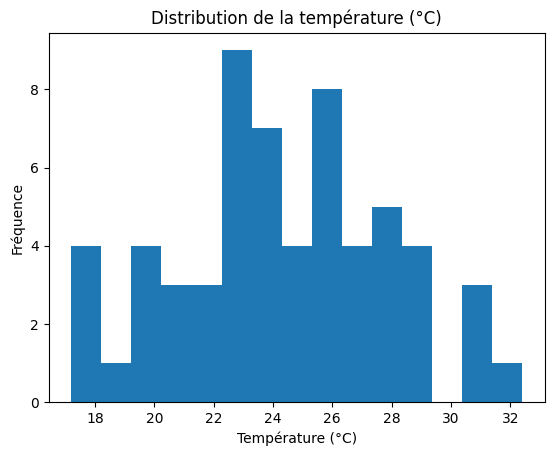

In [ ]:
import matplotlib.pyplot as plt

# 8.1) Histogramme de la température
plt.figure()
plt.hist(df['Temperature_C'].dropna(), bins=15)
plt.title("Distribution de la température (°C)")
plt.xlabel("Température (°C)")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
# 8.2) Courbe temporelle de la pluviométrie
plt.figure()
plt.plot(df['Date'], df['Rainfall_mm'])
plt.title("Pluviométrie journalière (mm)")
plt.xlabel("Date")
plt.ylabel("Pluie (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 8.3) Carte de chaleur des corrélations
import numpy as np

plt.figure()
corr = df[['Temperature_C','Rainfall_mm','Humidity_%','Yield_Index','Hydric_Index']].corr(numeric_only=True)
# Affichage simple d'une heatmap sans style spécifique
plt.imshow(corr, interpolation='nearest')
plt.title("Matrice de corrélation")
plt.colorbar()
plt.xticks(range(corr.shape[1]), corr.columns, rotation=45)
plt.yticks(range(corr.shape[0]), corr.columns)
plt.tight_layout()
plt.show()


## 9) Analyses groupées

In [ ]:
# Exemple : agrégation par mois
monthly = df.groupby('Month').agg({
    'Temperature_C':'mean',
    'Rainfall_mm':'sum',
    'Humidity_%':'mean',
    'Yield_Index':'mean'
}).reset_index()

monthly


In [ ]:
# Visualisation mensuelle de l'indice de rendement
plt.figure()
plt.plot(monthly['Month'], monthly['Yield_Index'])
plt.title("Indice de rendement moyen par mois")
plt.xlabel("Mois")
plt.ylabel("Yield_Index (moyen)")
plt.xticks(monthly['Month'])
plt.show()


## 10) Export des données nettoyées

In [ ]:
# Sauvegarder un CSV propre pour le TP
clean_path = "agri_data_clean.csv"
df.to_csv(clean_path, index=False)
print("Fichier exporté :", clean_path)


## 10) Mini-challenge (10 minutes)
- Créez une nouvelle variable : `Thermal_Stress = max(0, Temperature_C - 30)`
- Comparez `Yield_Index` moyen entre jours avec/ sans stress thermique
- Visualisez la distribution de `Thermal_Stress`

## 11) Questions de récap
1. Quelles colonnes présentaient des valeurs manquantes ?
2. Quelle stratégie d'imputation avez-vous appliquée ? Pourquoi ?
3. Quelle variable explique le mieux `Yield_Index` d'après la corrélation ?